In [1]:
import numpy as np
import cmath
import imageio
import os

In [2]:
import matplotlib.pyplot as plt
#%matplotlib inline

In [3]:
def pulse_width(a):
    k = max(np.abs(a))/2
    b = np.argmin(np.abs((np.abs(a) - k)))#,axis=0)
    return np.abs(len(a) - 2*(b+1))*Dtau
    
    

In [334]:
distance = 5000 #fiber lenght 
#beta2 =-1#input(’dispersion: 1 for normal, -1 for anomalous’);% #to remove
Beta2 =-1
N = 1 #(’Nonlinear parameter N = ’); % soliton order
mshape = 1#(’m = 0 for sech, m > 0 for super-Gaussian = ’);
mshape_2 = 1
chirp0 = 0#; % input pulse chirp (default value)
nt = 1024
Tmax = 32
#alpha_amp = 0.3#to remove
#Alpha_amp = 0.3
phase_difference = -np.pi 

Simulation parameters

In [335]:
#step_num = np.round(20*distance*N**2)# No. of z steps to #to remove
Step_num = np.round(20*distance*N**2)
Deltaz = distance/Step_num
#deltaz = distance/step_num# step size in z #to remove
dtau = (2*Tmax)/nt# step size in tau #to remove
Dtau = (2*Tmax)/nt

Grids

In [6]:
tau = np.linspace(-nt/2,nt/2-1, nt)*Dtau# temporal grid #to remove
Omega = (np.pi/Tmax)*np.array([np.linspace(0,nt/2-1,nt/2), np.linspace(-nt/2,-1,nt/2)])
Omega = np.reshape(Omega,(np.product(Omega.shape),))

In [37]:
Dispersion = np.exp(-0.5j*Beta2*Omega**2*Deltaz)
Hhz = 1j*N**2*Deltaz

Input field profile

In [316]:
def savepic(i,uu,vv):
    plt.clf()
    plt.plot(tau, np.abs(uu)**2)
    plt.plot(tau, np.abs(vv)**2)
    plt.axis([-5,5,0,1])
    plt.xlabel('Normalized Time')
    plt.ylabel('Normalized Power')
    plt.title('First and second core pulses shape')
    pic_name = 'C:/Users/ilyag/Pictures/sample/SP_pic/{0}.png'.format(i)
    plt.savefig(pic_name)

def shape_cores(mshape,phase):
    if mshape == 0:
        uu = np.cosh(tau)**(-1)*np.exp(-0.5j*chirp0*tau**2)*np.exp(1j*phase) # soliton
    elif mshape == -1:
        uu = np.zeros(len(tau))# no pulse
    else: #% super-Gaussian
        uu = np.exp(-0.5*(1+1j*chirp0)*tau**(2*mshape))*np.exp(1j*phase)
    return uu

def two_core(input_u, input_v, Alpha_amp):
    uu = input_u 
    vv = input_v
    temp = uu*np.exp(np.abs(uu)**2*Hhz/2)
    temp_v = vv*np.exp(np.abs(vv)**2*Hhz/2)
    alpha = -Alpha_amp*np.ones(Step_num)# + np.random.rand(Step_num)*0.5*Alpha_amp
    pulse_width_u = np.empty(Step_num)
    pulse_width_v = np.empty(Step_num)
    for i in range(Step_num):
        M = np.array(([np.cosh(1j*alpha[i]*Deltaz),np.sinh(1j*alpha[i]*Deltaz)],[np.sinh(1j*alpha[i]*Deltaz),np.cosh(1j*alpha[i]*Deltaz)]))
        V = np.array(([np.fft.fft(temp),np.fft.fft(temp_v)]))
        T = M.dot(V)*np.exp(0.5j*Beta2*Omega**2*Deltaz - 1j*alpha[i]*Deltaz)
        uu = np.fft.ifft(T[0])
        vv = np.fft.ifft(T[1])
        temp = uu*np.exp(np.abs(uu)**2*Hhz) 
        temp_v = vv*np.exp(np.abs(vv)**2*Hhz)
        if i%25 == 0:
            savepic(i,temp, temp_v)
        pulse_width_u[i] = sum(np.abs(temp)**2)#pulse_width(np.abs(temp)**2)
        pulse_width_v[i] = sum(np.abs(temp_v)**2)#pulse_width(np.abs(temp_v)**2)
    uu = temp*np.exp(np.abs(temp)**2*Hhz/2)
    vv = temp_v*np.exp(np.abs(temp_v)**2*Hhz/2)
    temp = np.fft.fftshift(np.fft.ifft(uu))*(nt*dtau)/np.sqrt(2*np.pi)#Final spectrum
    return {'shape':(uu,vv),'spectrum':temp,'width':(pulse_width_u,pulse_width_v)}
    
def plot_shape(res, input_v):
    plt.clf()
    plt.plot(tau, np.abs(res['shape'][1])**2)
    plt.plot(tau,np.abs(input_v)**2)
    plt.plot(tau, np.abs(res['shape'][0])**2)
    plt.axis([-5,5,0,1])
    plt.xlabel('Normalized Time')
    plt.ylabel('Normalized Power')
    plt.title('Output and Input Pulse Shape of second core')
    plt.legend(['output second core','input second core','output first core'])
    plt.show()
    
def plot_width(res,name):
    plt.plot(range(Step_num)*Deltaz,res['width'][0])
    plt.plot(range(Step_num)*Deltaz,res['width'][1])
    plt.xlabel('distance')
    plt.ylabel('Pulse width')
    plt.legend(['first core','second core'])
    plt.savefig('C:/Users/ilyag/Pictures/sample//width//'+name+'.png')
    plt.show()
    
    
def gif_create(name):
    images = []
    path = 'C:/Users/ilyag/Pictures/sample/SP_pic'
    filenames = os.listdir(path)
    with imageio.get_writer('C:/Users/ilyag/Pictures/sample/gif_only/'+name+'.gif', mode='I') as writer:
        for filename in filenames:
            image = imageio.imread(path+'/'+filename)
            writer.append_data(image)
        
    

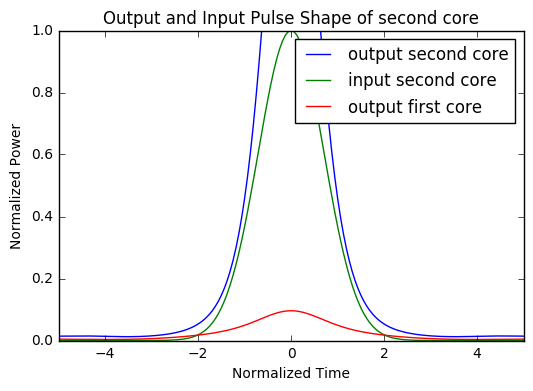

In [115]:
input_v = shape_cores(1,0)
res = two_core(shape_cores(1,np.pi),input_v,0.3)
plot_shape(res,input_v)

In [33]:
gif_create('strange_stuff')

C:\Users\ilyag\Anaconda3\lib\site-packages\ipykernel\__main__.py:63: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\ilyag\Anaconda3\lib\site-packages\ipykernel\__main__.py:64: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


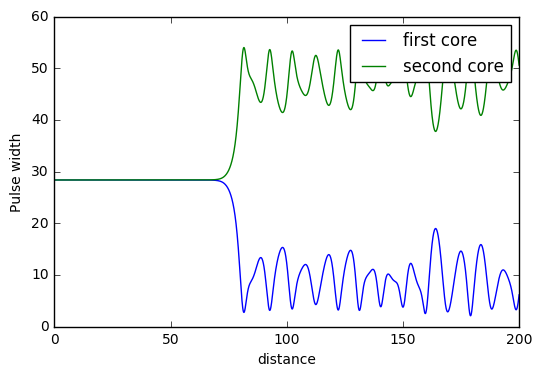

In [116]:
plot_width(res,'strange_stuff')


In [337]:
energylong = [(two_core(shape_cores(1,0),shape_cores(1,np.pi),alpha)['width'],alpha) for alpha in np.linspace(0,1,11)]

In [336]:
print(distance,Step_num)

5000 100000


In [333]:
for e in energylong:
    #e = energy[i]
    #plt.plot(2*np.pi*np.fft.fftfreq(e[0][0].shape[-1]),np.abs(np.fft.fft(e[0][0])))
    #plt.plot(np.abs(np.fft.fft(e[0][1])))
    plt.plot(range(Step_num)*Deltaz,e[0][0])
    plt.plot(range(Step_num)*Deltaz,e[0][1])
    #plt.title(str(np.argmax(np.abs(np.fft.fft(e[0][0]))[1:-1])))
    plt.title('phase = $\pi$')
    plt.axis([400,1600,0,60])
    plt.xlabel('distance')
    plt.ylabel('energy')
    pic_name = 'C:/Users/ilyag/Pictures/sample/exchange/{0}.png'.format(e[1])
    plt.legend(('first core','second core'))
    plt.savefig(pic_name)
    plt.clf()

C:\Users\ilyag\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\ilyag\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [324]:
freq = np.array([2*np.pi*np.fft.fftfreq(e[0][0].shape[-1])[np.argmax(np.abs(np.fft.fft(e[0][0][400:]))[1:1999])] for e in energylong])

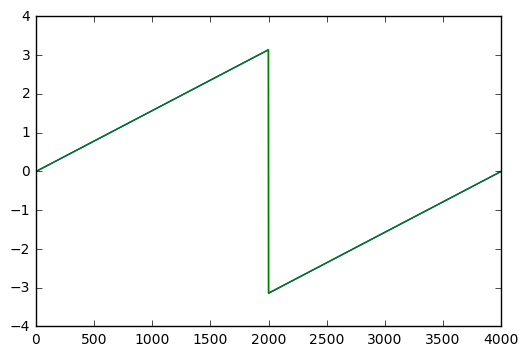

In [289]:
plt.plot(2*np.pi*np.fft.fftfreq(energy[0][0][0].shape[-1]))
plt.show()

C:\Users\ilyag\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


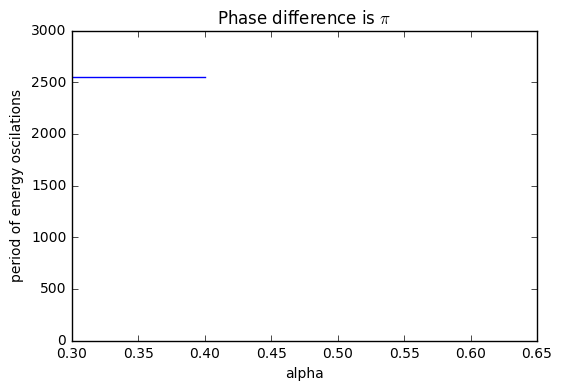

In [326]:
plt.plot(np.linspace(0,1,11), 1/freq)
plt.title('Phase difference is $\pi$')
plt.xlabel('alpha')
plt.ylabel('period of energy oscilations')
#plt.legend(('noiseless alpha','alpha with noise'))
plt.savefig('period_pi_fouirier')
plt.show()

In [212]:
energy2 = [(two_core(shape_cores(1,np.pi/2),shape_cores(1,0),alpha)['width'],alpha) for alpha in alphahalf]

C:\Users\ilyag\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\ilyag\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\ilyag\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\ilyag\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


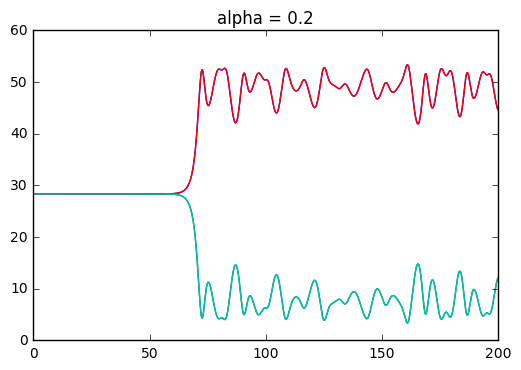

In [95]:
j = 2
e1 = energy[j]
e2 = energy2[j]
plt.plot(range(Step_num)*Deltaz,e1[0][0])
plt.plot(range(Step_num)*Deltaz,e1[0][1])
plt.title('alpha = ' + str(e1[1]))
plt.plot(range(Step_num)*Deltaz,e2[0][0])
plt.plot(range(Step_num)*Deltaz,e2[0][1])
plt.show()

In [181]:
alphapiquad = [0.2,0.221,0.2421,0.2631,0.2842,0.305,0.32631,0.347,0.36842,0.389,0.4105,0.43157,0.4526,0.4736,0.494736,0.5157,0.53684,0.55789,0.578947,0.6]
Periodquad = 120/np.array([5,6,6.5,7.5,8.5,9,10,10,11,11,12,15,15.5,14.5,16,16,20,20.5,21.5,19])
Periodquad_noise = 120/np.array([5,7,7,8,6,8,8,8,7,9,7,10,10,10,11,12,11,12,12.5,16])
len(Periodquad)

20

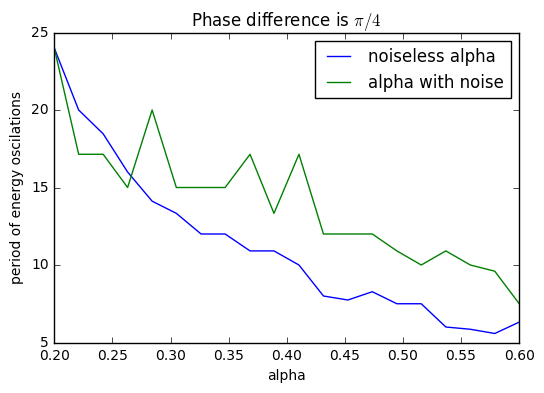

In [185]:
plt.plot(alphapiquad,Periodquad)
plt.plot(alphapiquad,Periodquad_noise)
plt.title('Phase difference is $\pi/4$')
plt.xlabel('alpha')
plt.ylabel('period of energy oscilations')
plt.legend(('noiseless alpha','alpha with noise'))
plt.savefig('period_pi_quad_and_noise')
plt.show()

In [169]:
alphahalf = [0.2,0.225,0.25,0.275,0.3,0.32,0.34,0.36,0.38,0.42,0.44,0.46,0.48]
periodhalf = 120/np.array([8,9,10,10,7,11,12.5,13,11,11,11,12,13])
len(periodhalf)

13

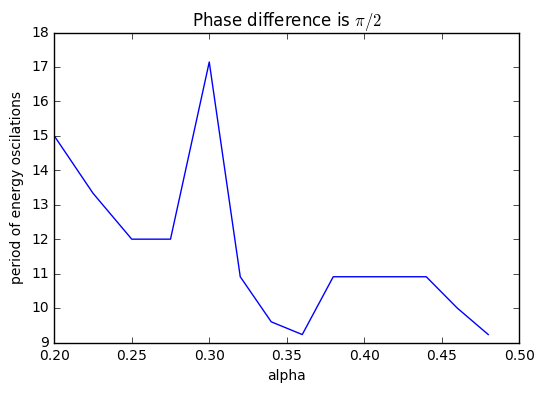

In [186]:
plt.plot(alphahalf,periodhalf)
plt.title('Phase difference is $\pi/2$')
plt.xlabel('alpha')
plt.ylabel('period of energy oscilations')
plt.savefig('period_pi_half')
plt.show()

In [171]:
alphapi = [0.3,0.32,0.34,0.36,0.38,0.4,0.42,0.44,0.46,0.48]
periodpi = np.array([120/12,120/13,120/12,120/11,120/11,120/11,120/9,100/8,80/6,60/4])

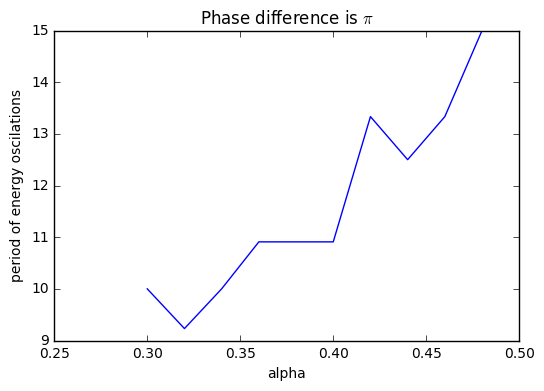

In [187]:
plt.plot(alphapi,periodpi)
plt.title('Phase difference is $\pi$')
plt.xlabel('alpha')
plt.ylabel('period of energy oscilations')
plt.savefig('period_pi')
plt.show()

In [9]:

if mshape == 0:
    uu = np.cosh(tau)**(-1)*np.exp(-0.5j*chirp0*tau**2) # soliton
else: #% super-Gaussian
    uu = np.exp(-0.5*(1+1j*chirp0)*tau**(2*mshape))

In [10]:
if mshape_2 == 0:
    vv = np.cosh(tau)**(-1)*np.exp(-0.5j*chirp0*tau**2)*np.exp(1j*phase_difference) # soliton
else: #% super-Gaussian
    vv = np.exp(-0.5*(1+1j*chirp0)*tau**(2*mshape_2))*np.exp(1j*phase_difference)
if mshape_2 == -1:
    vv = np.zeros(len(tau))# no pulse

input pulse shape and spectrum


Two cores

In [21]:
input_u = uu
input_v = vv
temp = uu*np.exp(np.abs(uu)**2*hhz/2)
temp_v = vv*np.exp(np.abs(vv)**2*hhz/2)
energy_1 = sum(np.abs(uu)**2)
energy_2 = sum(np.abs(vv)**2)
en_error = np.empty(step_num)
pulse_width_u = np.empty(step_num)
pulse_width_v = np.empty(step_num)
for i in range(step_num):
    M = np.array(([np.cosh(1j*alpha[i]*deltaz),np.sinh(1j*alpha[i]*deltaz)],[np.sinh(1j*alpha[i]*deltaz),np.cosh(1j*alpha[i]*deltaz)]))
    V = np.array(([np.fft.fft(temp),np.fft.fft(temp_v)]))
    T = M.dot(V)*np.exp(0.5j*beta2*omega**2*deltaz - 1j*alpha[i]*deltaz)#changed
    uu = np.fft.ifft(T[0])
    vv = np.fft.ifft(T[1])
    en_error[i] = np.abs(sum(np.abs(uu)**2) + sum(np.abs(vv)**2) - energy_1 - energy_2)/(energy_1 + energy_2)
    temp = uu*np.exp(np.abs(uu)**2*hhz) 
    temp_v = vv*np.exp(np.abs(vv)**2*hhz)
    pulse_width_u[i] = pulse_width(np.abs(temp)**2)
    pulse_width_v[i] = pulse_width(np.abs(temp_v)**2)
uu = temp*np.exp(np.abs(temp)**2*hhz/2)
vv = temp_v*np.exp(np.abs(temp_v)**2*hhz/2)
temp = np.fft.fftshift(np.fft.ifft(uu))*(nt*dtau)/np.sqrt(2*np.pi)#Final spectrum

NameError: name 'uu' is not defined

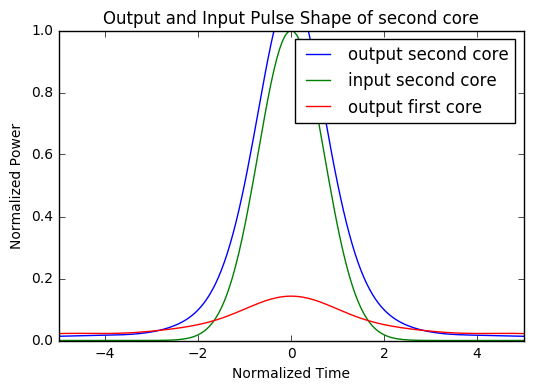

In [12]:
plt.plot(tau, np.abs(vv)**2)
plt.plot(tau,np.abs(input_v)**2)
plt.plot(tau, np.abs(uu)**2)
plt.axis([-5,5,0,1])
plt.xlabel('Normalized Time')
plt.ylabel('Normalized Power')
plt.title('Output and Input Pulse Shape of second core')
plt.legend(['output second core','input second core','output first core'])
#plt.savefig('srtange_things_same_phase.png')

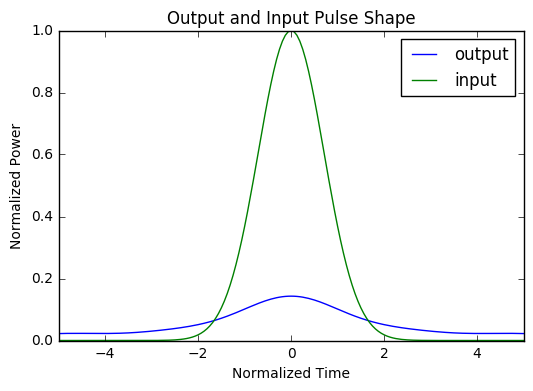

In [13]:
plt.plot(tau, np.abs(uu)**2)
plt.plot(tau,np.abs(input_u)**2)
plt.axis([-5,5,0,1])
plt.xlabel('Normalized Time')
plt.ylabel('Normalized Power')
plt.title('Output and Input Pulse Shape')
plt.legend(['output','input'])
#plt.savefig('crazy_stuff_samef_phase.png')

In [20]:
plt.plot(en_error)
plt.xlabel('Step number')
plt.ylabel('error')
plt.title('Relative energy error')

NameError: name 'en_error' is not defined

C:\Users\ilyag\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':
C:\Users\ilyag\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


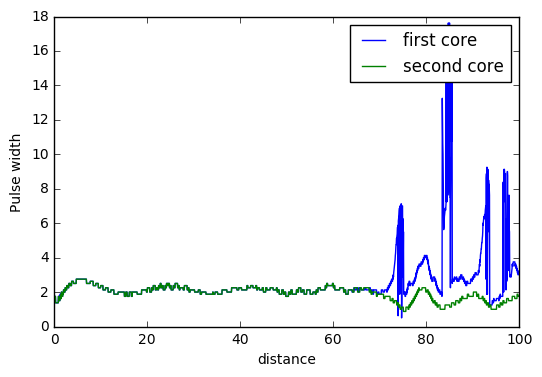

In [14]:
plt.plot(range(step_num)*deltaz,pulse_width_u)
plt.plot(range(step_num)*deltaz,pulse_width_v)
plt.xlabel('distance')
plt.ylabel('Pulse width')
plt.legend(['first core','second core'])
#plt.savefig('second_core_same_input_with_noises.png')

NameError: name 'input_temp_u' is not defined

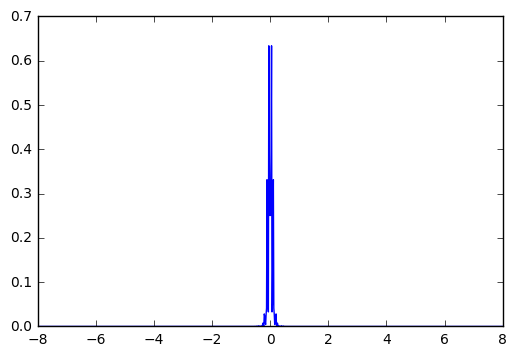

In [106]:
plt.plot(np.fft.fftshift(omega)/(2*np.pi), np.abs(temp)**2)
plt.plot(np.fft.fftshift(omega)/(2*np.pi), np.abs(input_temp_u)**2)
plt.axis([-0.5 ,0.5, 0, 2])
plt.xlabel('Normalized Frequency')
plt.ylabel('Spectral Power')
plt.title('Output and Input Pulse Spectrum')
plt.legend(['output','input'])

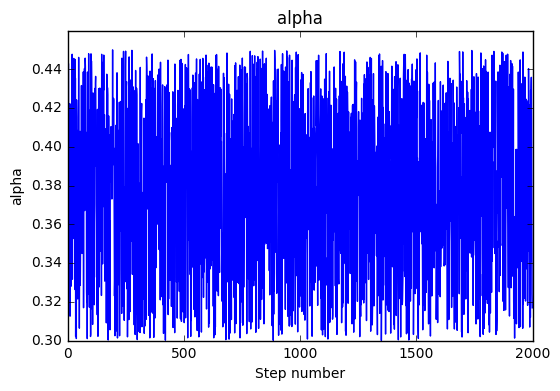

In [73]:
plt.plot(alpha)
plt.xlabel('Step number')
plt.ylabel('alpha')
plt.title('alpha')

In [58]:
input_u = uu
input_v = vv
temp = uu*np.exp(np.abs(uu)**2*hhz/2)
temp_v = vv*np.exp(np.abs(vv)**2*hhz/2)
for i in range(step_num):
    f_temp = np.fft.ifft(temp)*dispersion
    #f_temp_v = np.fft.ifft(temp_v)*dispersion
    uu = np.fft.fft(f_temp)
    #vv = np.fft.fft(f_temp_v)
    cu = uu
    #cv = vv
    #uu += 1j*alpha*(cv-cu)*deltaz
    #vv += 1j*alpha*(cu-cv)*deltaz
    temp = uu*np.exp(np.abs(uu)**2*hhz) #-1j*alpha*deltaz*cu)
    #temp_v = vv*np.exp(np.abs(vv)**2*hhz) #-1j*alpha*deltaz*cu)
uu = temp*np.exp(-np.abs(uu)**2*hhz/2)# Final field
temp = np.fft.fftshift(np.fft.ifft(uu))*(nt*dtau)/np.sqrt(2*np.pi)#Final spectrum

In [188]:
np.fft.fft(energy2[0])

TypeError: a float is required

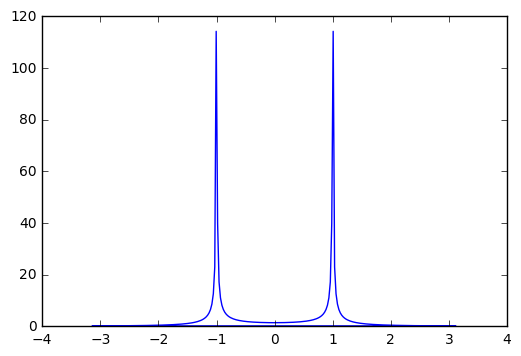

In [257]:
aa = np.sin(np.arange(256))
plt.plot(2*np.pi*np.fft.fftfreq(np.arange(256).shape[-1]),np.abs(np.fft.fft(aa)))
plt.show()

In [235]:
len(np.fft.fftfreq(100))

100

In [232]:
len(np.abs(np.fft.fft(aa)))

100